In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [2]:
np.random.seed(10)
p, q = (np.random.rand(i, 2) for i in (4, 5))
p_big, q_big = (np.random.rand(i, 80) for i in (100, 120))

print(p, "\n\n", q)

[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]] 

 [[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]]


Solution
===

In [24]:
def naive(p, q):
  # x = np.zeros((p.size, q.size))
  # a = 0
  # b = 0
  # for i in p:
  #   for j in q:
  #     print(j)
  #     x[a,b] = np.linalg.norm(i-j)
  #     b +=1
  #   a +=1
naive(p,q)

[0.16911084 0.08833981]
[0.68535982 0.95339335]
[0.00394827 0.51219226]
[0.81262096 0.61252607]
[0.72175532 0.29187607]
[0.16911084 0.08833981]
[0.68535982 0.95339335]
[0.00394827 0.51219226]
[0.81262096 0.61252607]
[0.72175532 0.29187607]
[0.16911084 0.08833981]


IndexError: ignored

NameError: ignored

### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [25]:
rows, cols = np.indices((p.shape[0], q.shape[0]))
print(rows, end='\n\n')
print(cols)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [12]:
p.shape[0]

4

In [5]:
print(p[rows.ravel()], end='\n\n')
print(q[cols.ravel()])

[[0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]]

[[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607

In [40]:
def with_indices(p, q):
    rows, cols = np.indices((p.shape[0], q.shape[0]))

    return np.square(p[rows.ravel()]-q[cols.ravel()])
    # for j in q[cols.ravel()]:
    #   for i in p[rows.ravel()]:
    #     print(np.linalg.norm(i-j))
    #return np.array([[ np.linalg.norm(i-j) for j in q[cols.ravel()]] for i in p[rows.ravel()]])
with_indices(p,q)

array([[3.62656651e-01, 4.56811947e-03],
       [7.38926342e-03, 8.69819975e-01],
       [5.88860365e-01, 2.41513582e-01],
       [1.70571630e-03, 3.50196606e-01],
       [2.45672153e-03, 7.35082878e-02],
       [2.15794994e-01, 4.36212786e-01],
       [2.67408786e-03, 4.18568486e-02],
       [3.96522050e-01, 5.59850583e-02],
       [3.20312369e-02, 1.85716431e-02],
       [7.76285799e-03, 2.08783028e-01],
       [1.08501841e-01, 1.86204668e-02],
       [3.49139711e-02, 5.30853152e-01],
       [2.44588353e-01, 8.25962412e-02],
       [9.86675732e-02, 1.50334104e-01],
       [4.98398057e-02, 4.49964894e-03],
       [8.38219937e-04, 4.51840603e-01],
       [2.37458321e-01, 3.71959956e-02],
       [3.76804773e-02, 6.16719852e-02],
       [3.77681654e-01, 2.19053751e-02],
       [2.74253785e-01, 2.19637175e-01]])

### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [7]:
from scipy.spatial.distance import cdist

def scipy_version(p, q):
    return cdist(p, q)

### Numpy Magic

In [8]:
def tensor_broadcasting(p, q):
    return np.sqrt(np.sum((p[:,np.newaxis,:]-q[np.newaxis,:,:])**2, axis=2))

# Compare methods

In [9]:
methods = [naive, with_indices, scipy_version, tensor_broadcasting]
timers = []
for f in methods:
    r = %timeit -o f(p_big, q_big)
    timers.append(r)

The slowest run took 12.41 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 192 ns per loop
The slowest run took 13.85 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 121 ns per loop
1000 loops, best of 5: 648 µs per loop
100 loops, best of 5: 2.53 ms per loop


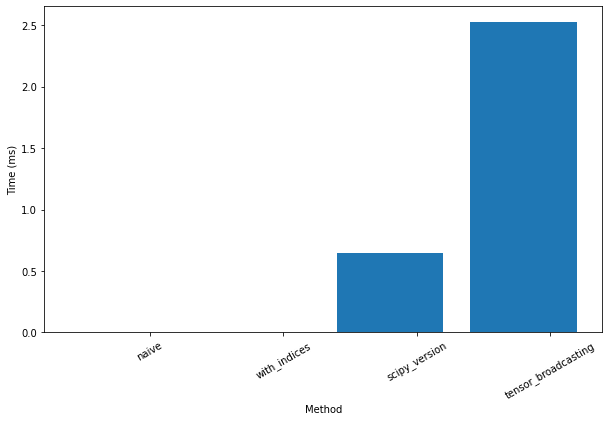

In [10]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(methods)), [r.best*1000 for r in timers], log=False)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods))+0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel('Method')
plt.ylabel('Time (ms)')
plt.show()